In [ ]:
import sys
print(sys.executable)
from xgboost import XGBClassifier
print("XGBoost imported successfully!")

c:\Users\mr027\anaconda3\python.exe
XGBoost imported successfully!


In [ ]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Import ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [ ]:
# Step 2: Load Dataset
iris = load_iris()
X = iris.data
y = iris.target

print("Shape of features:", X.shape)
print("Shape of labels:", y.shape)
print("\nSample features:\n", X[:5])
print("\nSample labels:", y[:5])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data (important for SVM and Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Shape of features: (150, 4)
Shape of labels: (150,)

Sample features:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Sample labels: [0 0 0 0 0]


In [ ]:
# Step 3: Initialize All Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(eval_metric='mlogloss'),
    "SVM": SVC()
}

In [ ]:
# Step 4: Train and Evaluate Each Model
results = {}

for name, model in models.items():
    print("========================================")
    print(f"Model: {name}")
    print("========================================")
    
    # Train model
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Evaluate
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    
    print("Accuracy:", round(acc, 4))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n")


Model: Logistic Regression
Accuracy: 1.0
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Model: Naive Bayes
Accuracy: 0.9778
Confusion Matrix:
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45


In [ ]:
# Step 5: Compare All Model Accuracies
df_results = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])
print("===== MODEL ACCURACY COMPARISON =====")
print(df_results)

===== MODEL ACCURACY COMPARISON =====
                 Model  Accuracy
0  Logistic Regression  1.000000
1          Naive Bayes  0.977778
2        Decision Tree  1.000000
3        Random Forest  1.000000
4              XGBoost  1.000000
5                  SVM  1.000000


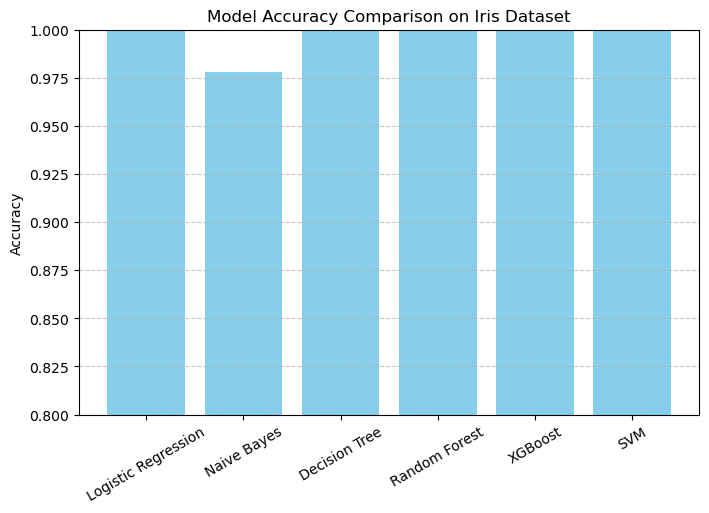

In [ ]:
# Step 6: Visualize Accuracy Comparison
plt.figure(figsize=(8,5))
plt.bar(df_results["Model"], df_results["Accuracy"], color="skyblue")
plt.title("Model Accuracy Comparison on Iris Dataset")
plt.ylabel("Accuracy")
plt.xticks(rotation=30)
plt.ylim(0.8, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
#inports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [ ]:
#LOAD DATA
df = pd.read_csv("Loan_Default.csv")
df.head()


,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [ ]:
#HANDLE MISSING VALUES
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())


In [ ]:
#DETECT NUMERIC & CATEGORICAL FEATURES
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

if "Status" in numeric_features:
    numeric_features.remove("Status")
if "Status" in categorical_features:
    categorical_features.remove("Status")

numeric_features, categorical_features


(['ID',
  'year',
  'loan_amount',
  'rate_of_interest',
  'Interest_rate_spread',
  'Upfront_charges',
  'term',
  'property_value',
  'income',
  'Credit_Score',
  'LTV',
  'dtir1'],
 ['loan_limit',
  'Gender',
  'approv_in_adv',
  'loan_type',
  'loan_purpose',
  'Credit_Worthiness',
  'open_credit',
  'business_or_commercial',
  'Neg_ammortization',
  'interest_only',
  'lump_sum_payment',
  'construction_type',
  'occupancy_type',
  'Secured_by',
  'total_units',
  'credit_type',
  'co-applicant_credit_type',
  'age',
  'submission_of_application',
  'Region',
  'Security_Type'])

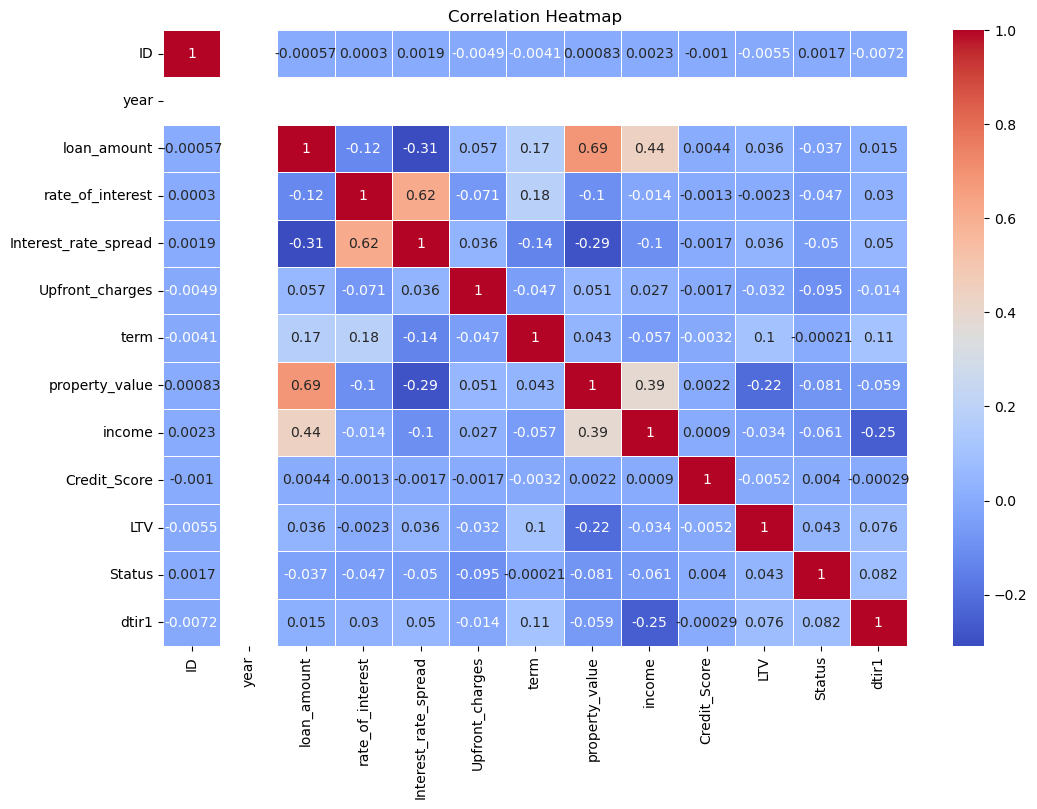

In [ ]:
#CORRELATION HEATMAP
plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
#ENCODE + SCALE + TRAIN/TEST SPLIT
df_encoded = df.copy()
label_encoders = {}

# Encode categoricals
for col in categorical_features:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le

# X and y
X = df_encoded.drop("Status", axis=1)
y = df_encoded["Status"]

# Scale numeric features
scaler = StandardScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [ ]:
#DEFINE ALL MODELS
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(eval_metric='mlogloss')
}


In [ ]:
#TRAIN MODELS + ACCURACY, CONFUSION, REPORT
results = {}
trained_models = {}

for name, model in models.items():
    print("\n===============================")
    print(name)
    print("===============================")

    model.fit(X_train, y_train)
    trained_models[name] = model

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print("\nAccuracy:", acc)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

results_df = pd.DataFrame(results.items(), columns=["Model", "Accuracy"])
results_df



Logistic Regression

Accuracy: 0.7820004035783951
Confusion Matrix:
 [[32106  1581]
 [ 8142  2772]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.95      0.87     33687
           1       0.64      0.25      0.36     10914

    accuracy                           0.78     44601
   macro avg       0.72      0.60      0.62     44601
weighted avg       0.76      0.78      0.74     44601


Naive Bayes

Accuracy: 0.7898701822829085
Confusion Matrix:
 [[33687     0]
 [ 9372  1542]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88     33687
           1       1.00      0.14      0.25     10914

    accuracy                           0.79     44601
   macro avg       0.89      0.57      0.56     44601
weighted avg       0.84      0.79      0.72     44601


Decision Tree

Accuracy: 0.9999103159121993
Confusion Matrix:
 [[33686     1]
 [    3 10911]]
Classific

,Model,Accuracy
0,Logistic Regression,0.782000
1,Naive Bayes,0.789870
2,Decision Tree,0.999910
3,Random Forest,0.999933
4,XGBoost,0.999888


C:\Users\mr027\AppData\Local\Temp\ipykernel_53460\3715039141.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=results_df, palette="viridis")


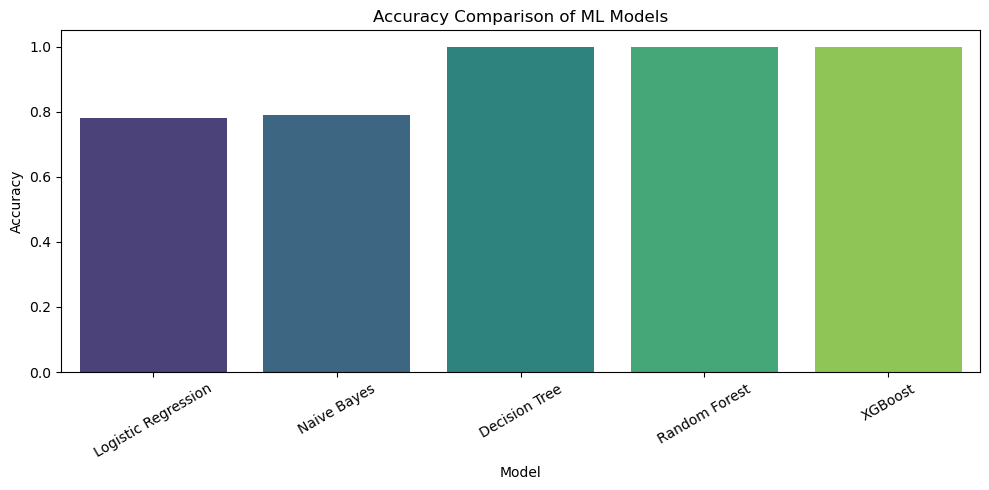

In [ ]:
#ACCURACY BAR GRAPH
plt.figure(figsize=(10,5))
sns.barplot(x="Model", y="Accuracy", data=results_df, palette="viridis")
plt.xticks(rotation=30)
plt.title("Accuracy Comparison of ML Models")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.savefig("accuracy_comparison.png")
plt.show()


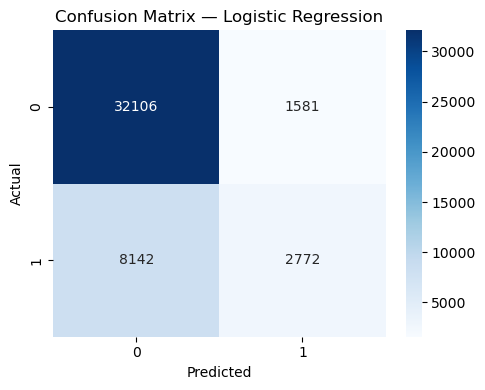

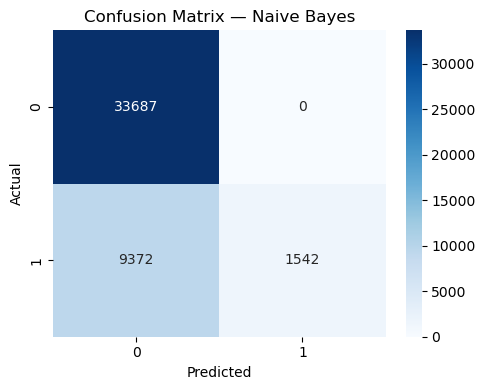

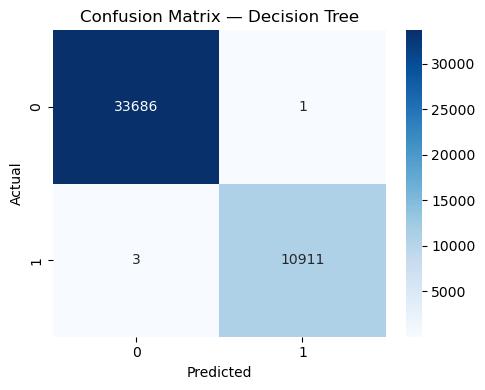

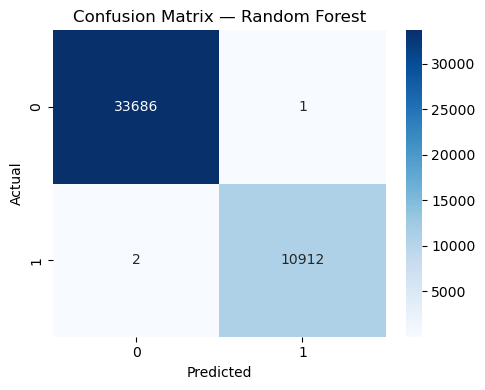

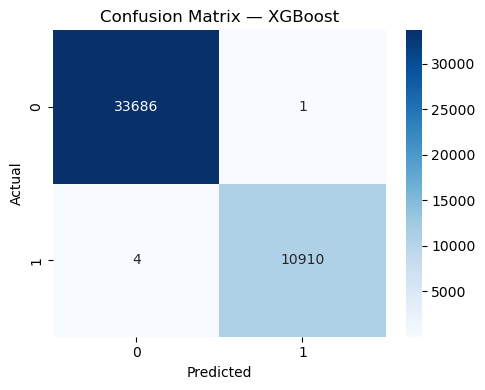

In [ ]:
#CONFUSION MATRIX HEATMAPS
for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
    plt.title(f"Confusion Matrix — {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()

    filename = f"confusion_matrix_{name.replace(' ', '_')}.png"
    plt.savefig(filename)

    plt.show()


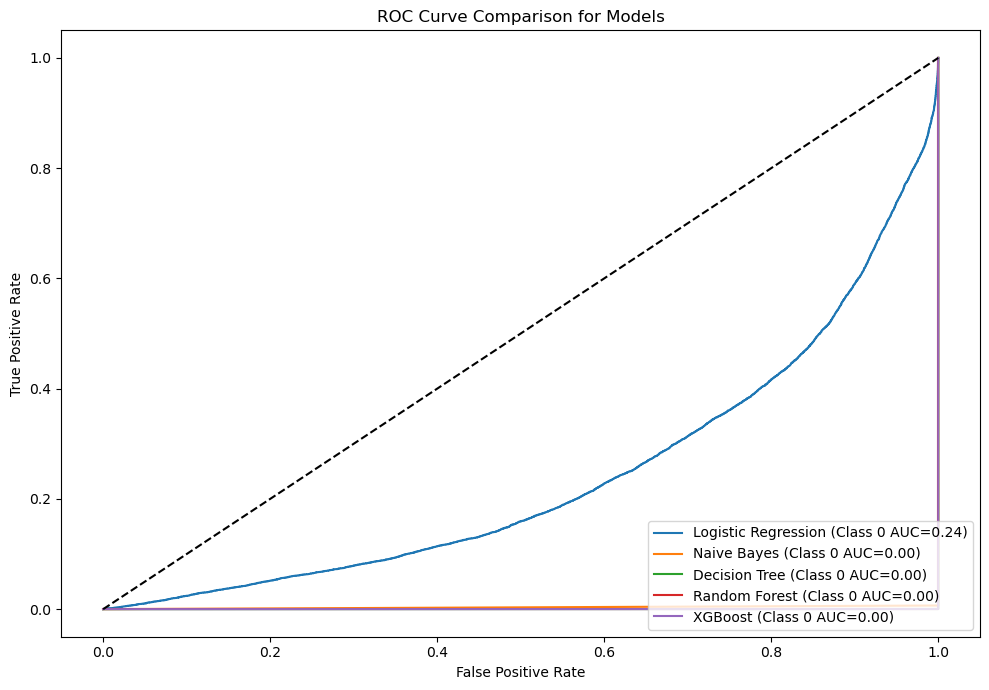

In [ ]:
#ROC CURVE COMPARISON
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize target for ROC curve (Handles Multi-class)
y_test_bin = label_binarize(y_test, classes=sorted(y.unique()))
n_classes = y_test_bin.shape[1]

plt.figure(figsize=(10,7))

for name, model in trained_models.items():
    # Check if model supports probability
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)
    else:
        continue  # Skip models without predict_proba

    # Compute ROC curve & AUC for each class
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        auc_score = auc(fpr, tpr)

        plt.plot(fpr, tpr, label=f"{name} (Class {i} AUC={auc_score:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve Comparison for Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("roc_curve_comparison.png")
plt.show()


C:\Users\mr027\AppData\Local\Temp\ipykernel_53460\1808450914.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=rf_importance_df, palette="coolwarm")


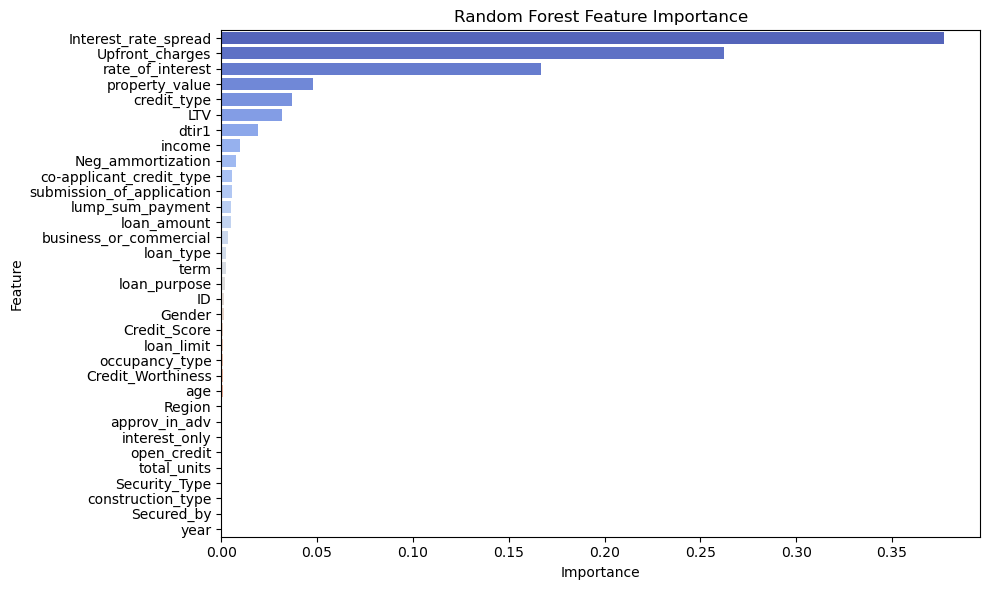

In [12]:
# RANDOM FOREST FEATURE IMPORTANCE
rf_model = trained_models["Random Forest"]
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Create DataFrame
rf_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=rf_importance_df, palette="coolwarm")
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.savefig("random_forest_feature_importance.png")
plt.show()


C:\Users\mr027\AppData\Local\Temp\ipykernel_53460\3061079335.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=xgb_importance_df, palette="viridis")


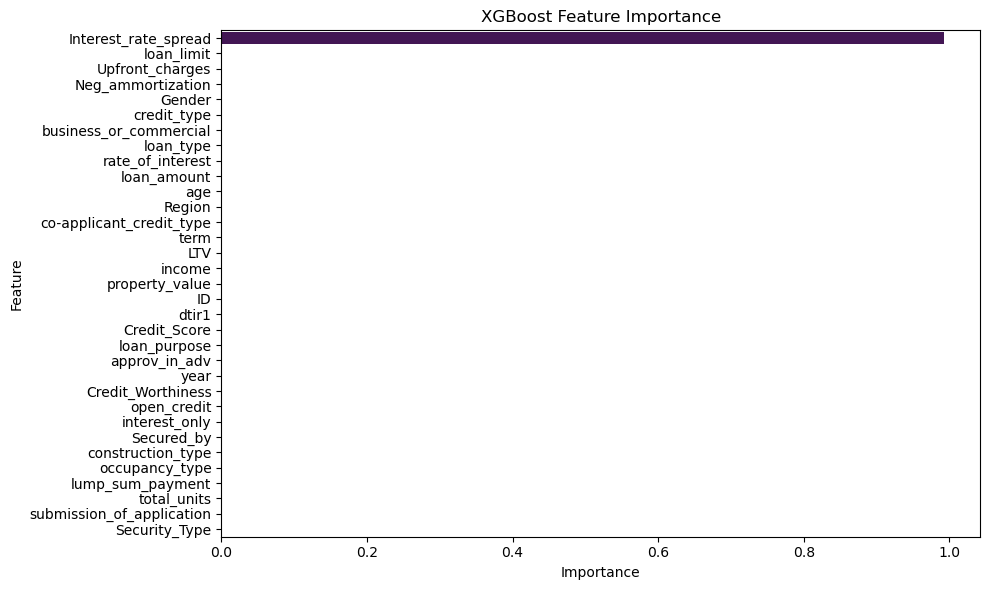

In [13]:
# XGBOOST FEATURE IMPORTANCE
xgb_model = trained_models["XGBoost"]

importances = xgb_model.feature_importances_
feature_names = X_train.columns

xgb_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=xgb_importance_df, palette="viridis")
plt.title("XGBoost Feature Importance")
plt.tight_layout()
plt.savefig("xgboost_feature_importance.png")
plt.show()
